<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-Diego1733/blob/main/Nov03-04/Nov03_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRIMERA RED NEURONAL

## EJERCICIO: Programación de perceptrón de clasificación de perros y gatos

64 X 64 pixeles

x = VECTOR DE PIXELES RGB

Transformar imagen y colores en vector de pixeles ( 64 x 64 x 3 (3 colores; RGB))

Objetivo: Identificar si tenemos gatos o perros con vector de salida (0, 1)

Sistema de una neurona que me lleve al vector de pixeles al vector de salida

Separaremos en muestras de entrenamiento y muestra de prueba.

USAREMOS LA FUNCIÓN DE ACTIVACIÓN SIGMOIDE: $$ a = \sigma (z) = \frac{1}{1+ exp(-z)} $$

$$ \frac{d\sigma (z)}{dz} = \frac{exp(z)}{(exp(z) + 1)^2}$$

Encontraremos el mínimo de la función costo usando gradiente descendente.

## Algoritmo:
1. Define el conjunto de entrenamiento:

El conjunto de entrenamiento debe contener datos que representen la tarea que la red neuronal debe realizar. Por ejemplo, si la red neuronal se va a utilizar para clasificar imágenes, el conjunto de entrenamiento debe contener imágenes etiquetadas con su clase correspondiente.

2. Realiza el proceso iterativo de minimización de la función costo usando el método de gradiente descendente:

El método de gradiente descendente funciona iterativamente. En cada iteración, el algoritmo calcula el gradiente de la función costo en la dirección actual de los pesos de la red neuronal. Luego, el algoritmo actualiza los pesos en la dirección opuesta al gradiente.

La siguiente ecuación muestra cómo se calcula el gradiente de la función costo:

$$∇_w J(w) = \sum_{i=1}^n \frac{\partial J(w)}{\partial w_i}$$
donde:

w es el vector de pesos de la red neuronal
J(w) es la función costo
n es el número de datos en el conjunto de entrenamiento
$\frac{\partial J(w)}{\partial w_i}$ es la derivada parcial de la función costo con respecto al peso $w_i$
El algoritmo de gradiente descendente continúa iterando hasta que la función costo se minimiza.

3. Evalúa la función z y σ(z) (Función de activación):

La función z es la suma ponderada de las entradas de la red neuronal. Se calcula de la siguiente manera:

$$z = w^T x$$
donde:

w es el vector de pesos de la red neuronal
x es el vector de entradas de la red neuronal
La función de activación σ(z) determina cómo se transforma la salida de la red neuronal. Hay muchos tipos diferentes de funciones de activación, como la función sigmoide, la función tangente hiperbólica y la función ReLU.

4. Evalúa la función costo:

La función costo se evalúa utilizando las salidas de la red neuronal y los valores esperados. La función costo mide la distancia entre las salidas de la red neuronal y los valores esperados.

Hay muchos tipos diferentes de funciones costo, como la función de error cuadrático medio (MSE), la función de error absoluto medio (MAE) y la función de pérdida de Cross-Entropy.

El algoritmo de gradiente descendente es un algoritmo sencillo y eficaz para entrenar redes neuronales. Sin embargo, puede ser lento para converger en algunos casos. Hay otros algoritmos de entrenamiento de redes neuronales que pueden ser más rápidos, como el algoritmo de propagación hacia atrás.

In [16]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
#Los datos corresponden a un subset del dataset cats vs dogs de https://www.kaggle.com/c/dogs-vs-cats
files = glob.glob('/content/drive/MyDrive/ML2023/CATS_DOGS/*')

In [19]:
M = len(files)
print(M)

1787


In [20]:
#numero de pixeles para nuestras imágenes.
num_px=64

Preparar dataset de entrenamiento

In [21]:
train_x = []
train_y = []
for file in files[:100]:
    img = Image.open(file)
    img = img.resize((num_px,num_px))
    data = np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)
train_y = np.asarray(train_y)
train_x = np.asarray(train_x)

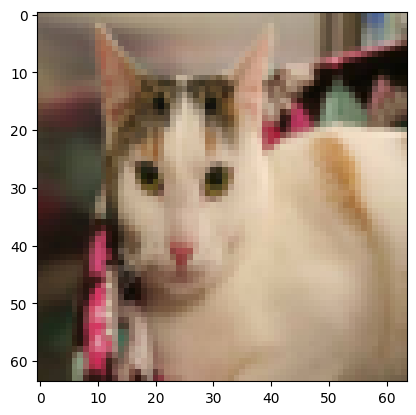

In [22]:
plt.imshow(train_x[0])

Preparamos dataset de prueba

In [23]:
test_x = []
test_y = []
for file in files[1700:]:
    #print(file)
    img = Image.open(file)
    img = img.resize((num_px,num_px))
    data = np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)
test_y = np.asarray(test_y)
test_x = np.asarray(test_x)

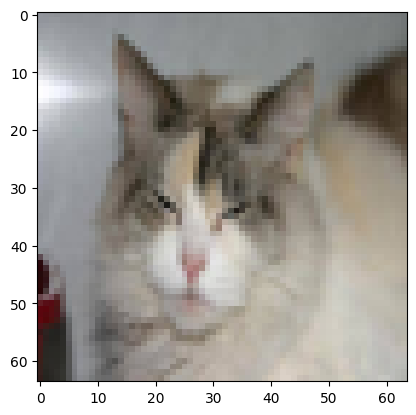

In [24]:
plt.imshow(test_x[1])

Hacemos una transformación de los arreglos que contienen las imagenes para que sean arreglos de una dimensión.

returns (1, 100) which means that the array has 1 dimensions, where the first dimension has 1 elements and the second has 100

In [25]:
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T
test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_y = train_y.reshape((1,train_y.shape[0]))
test_set_y = test_y.reshape((1,test_y.shape[0]))

Normalizamos las imágenes

In [26]:
train_set_x = train_x_flatten/255
test_set_x = test_x_flatten/255

In [36]:
print(f"train_set_x.shape {train_set_x.shape}")
print(f"train_set_y.shape {train_set_y.shape} \n")
print(f"test_set_x.shape {test_set_x.shape}")
print(f"test_set_y.shape {test_set_y.shape}")


train_set_x.shape (12288, 100)
train_set_y.shape (1, 100) 

test_set_x.shape (12288, 87)
test_set_y.shape (1, 87)


Declaramos funciones:

In [94]:
# Inicializar los parámetros w y b
def initialize_parameters(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función costo
def compute_cost(A, Y):
    m = Y.shape[1]
    cost = -np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) / m
    return cost

# Propagación hacia adelante para obtener la salida del modelo
def forward_propagation(w, b, X):
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    return A

# Propagación hacia atrás para calcular gradientes
def backward_propagation(X, Y, A):
    m = X.shape[1]
    dz = A - Y
    dw = np.dot(X, dz.T) / m
    db = np.sum(dz) / m
    return dw, db

# Actualizar los parámetros usando el gradiente descendente
def update_parameters(w, b, dw, db, learning_rate):
    w -= learning_rate * dw
    b -= learning_rate * db
    return w, b

# Paso de un solo paso de gradiente descendente
def gradient_descent(X, Y, w, b, learning_rate):

    #Parámetros para gradiente descendente
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    cost = compute_cost(A, Y)

    dz = A - Y
    dw = np.dot(X, dz.T) / X.shape[1]
    db = np.sum(dz) / X.shape[1]

    # Actualizamos parámetros
    w, b = update_parameters(w, b, dw, db, learning_rate)
    return w, b, cost

# Modelo de regresión logística con gradiente descendente
def model_with_gradient_descent(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate):
    w, b = initialize_parameters(X_train.shape[0])

    # Itera para cada uno de nuestros conjuntos de entrenamiento y muestra cada 100
    for i in range(num_iterations):
        w, b, cost = gradient_descent(X_train, Y_train, w, b, learning_rate)

        if i % 100 == 0:
            print(f"Iteración {i}, Costo de entrenamiento: {cost}")

    return w, b

Entrenamos neurona, definiendo nuestras funciones

In [96]:
# Número de iteraciones
num_iterations = 1500

# Taza de aprendizaje
learning_rate = 0.01

# Entrenar el modelo con gradiente descendente:
trained_w_gd, trained_b_gd = model_with_gradient_descent(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations, learning_rate)

# Evaluar en el conjunto de prueba
predictions_gd = forward_propagation(trained_w_gd, trained_b_gd, test_set_x)
# Usando el criterio x < 5 -> 0, x >= 5 -> 1, redondeamos resultado
rounded_predictions_gd = np.round(predictions_gd)

# Se saca la media para la precisión de nuestra neurona
accuracy_gd = np.mean(rounded_predictions_gd == test_set_y)
print(f"\nPrecisión en el conjunto de prueba (con gradiente descendente): {accuracy_gd * 100}%")

Iteración 0, Costo de entrenamiento: 0.6931471805599453
Iteración 100, Costo de entrenamiento: 0.26213078249249133
Iteración 200, Costo de entrenamiento: 0.2352089522773076
Iteración 300, Costo de entrenamiento: 0.1065911720485113
Iteración 400, Costo de entrenamiento: 0.08640978931569908
Iteración 500, Costo de entrenamiento: 0.07246366255793019
Iteración 600, Costo de entrenamiento: 0.06224665430533086
Iteración 700, Costo de entrenamiento: 0.054461010578886394
Iteración 800, Costo de entrenamiento: 0.048345521056926515
Iteración 900, Costo de entrenamiento: 0.043423731946892676
Iteración 1000, Costo de entrenamiento: 0.039382904749019315
Iteración 1100, Costo de entrenamiento: 0.036009710380841525
Iteración 1200, Costo de entrenamiento: 0.0331538852996681
Iteración 1300, Costo de entrenamiento: 0.030706674984812783
Iteración 1400, Costo de entrenamiento: 0.02858751653269671

Precisión en el conjunto de prueba (con gradiente descendente): 78.16091954022988%


Ponemos a prueba con datos aleatorios de nuestro conjunto de prueba:

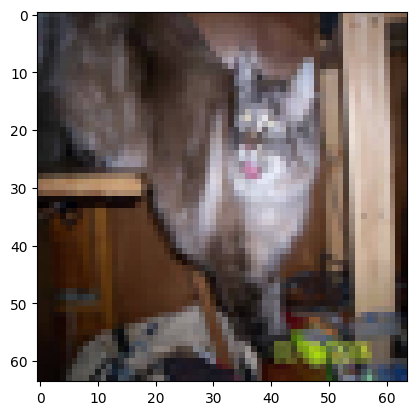

Predicción: 1.0

Perro.


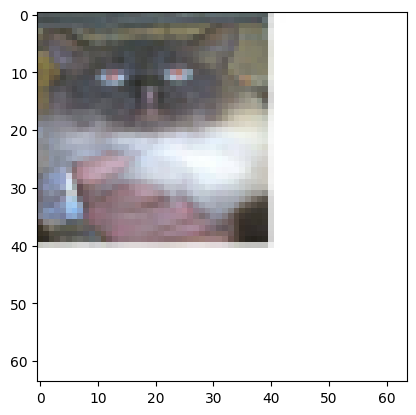

Predicción: 0.0

Gato.


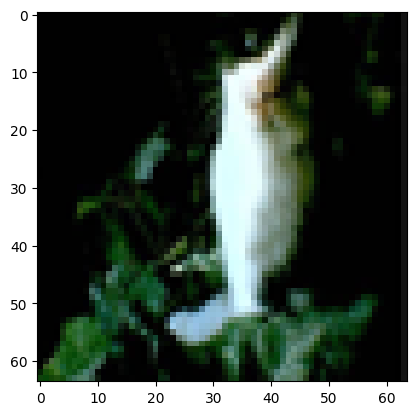

Predicción: 0.0

Gato.


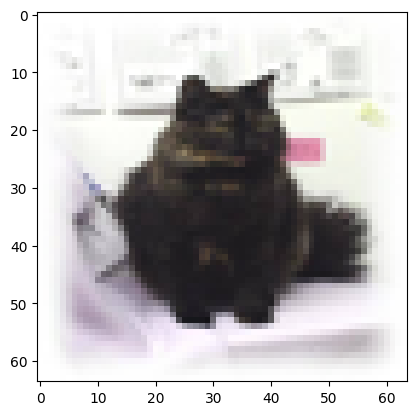

Predicción: 1.0

Perro.


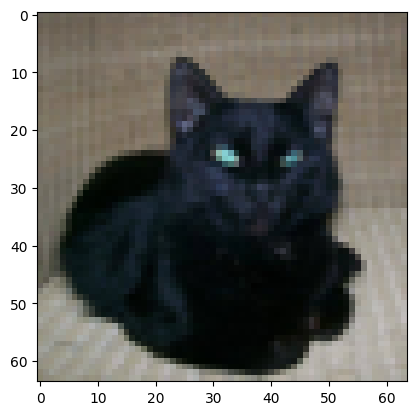

Predicción: 0.0

Gato.


In [98]:
# Mostrar resultados para 5 elementos del conjunto de prueba
for i in range(5):
    # Usamos números aleatorios para evaluar de mejor manera
    index = np.random.randint(0, test_set_x.shape[1])
    # Mostrar imagen
    image = Image.fromarray((test_set_x[:, index] * 255).astype(np.uint8).reshape((num_px, num_px, 3)))
    plt.imshow(image)
    plt.show()
    print(f"Predicción: {rounded_predictions_gd[0, index]}\n")
    if rounded_predictions_gd[0, index] == 1:
        print("Perro.")
    else:
        print("Gato.")